import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [24]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/42

make measure image

In [8]:
def_img = io.imread("image\\10.16.2020 Heptane-60%water40%ethanol\\frame 1\\1-25-44 PM\\10.16.2020 (2) 0451.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

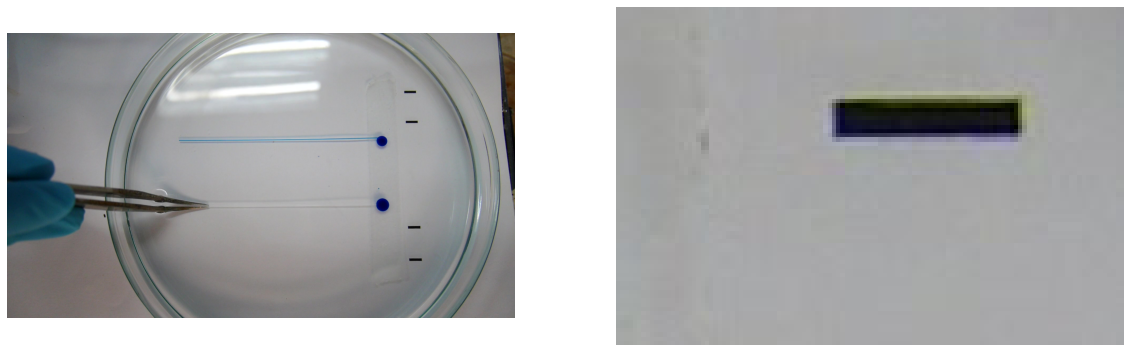

In [21]:
measure_im = crop(def_img, ((200, 800), (1450, 350), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

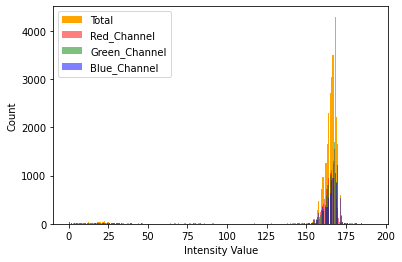

In [22]:
plot_histogram(measure_im)

[27, 52]
[26, 94]


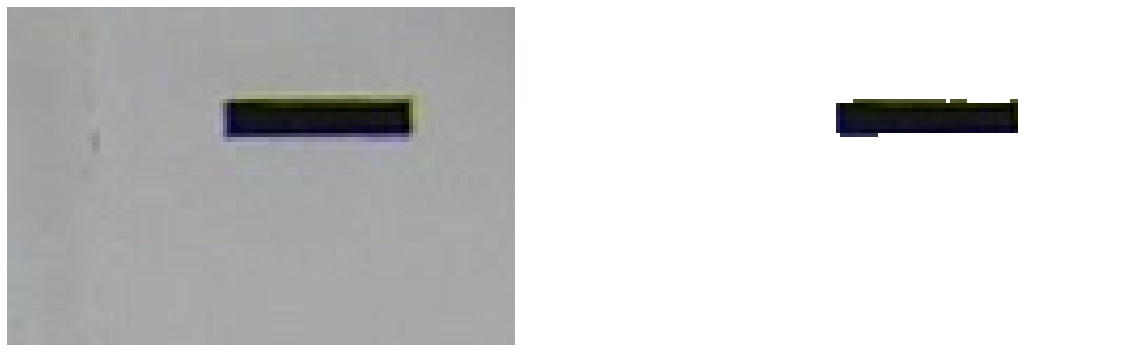

length of picture is  42.01190307520001 pixel


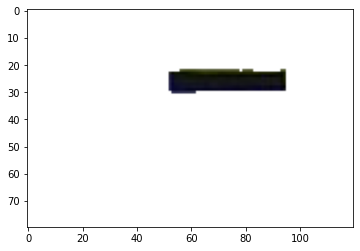

In [23]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

42 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 42


find definition length on 2217 picture

(1080, 1920, 3) (90, 683, 3)


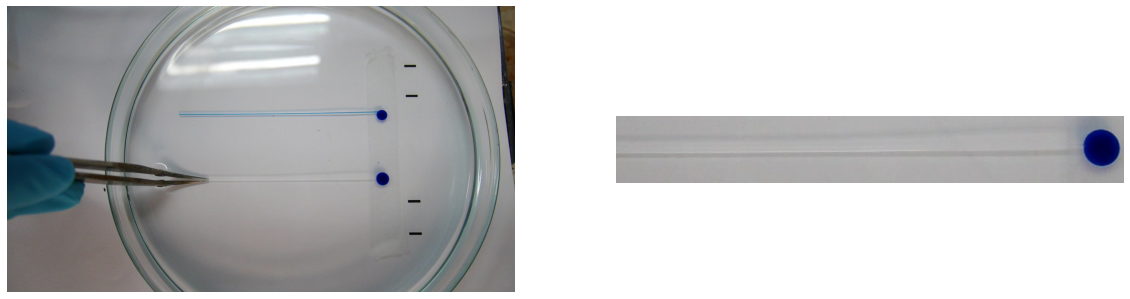

In [39]:
def_crop_im = crop(def_img, ((610, 380), (767, 470), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

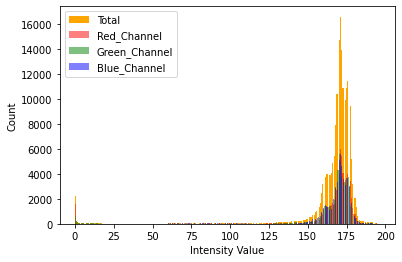

In [40]:
plot_histogram(def_crop_im)

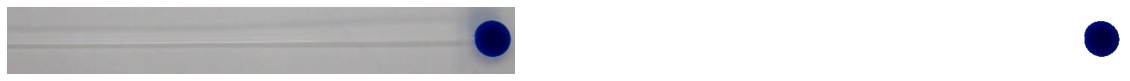

In [41]:
Tdef_img2 = thresholding(30,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[38, 629]
[44, 676]
ldef  47.38143096192854 pixel


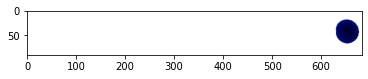

In [42]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 0451 to 0673

In [49]:
number_of_picture = 451
thresh = 45
template1 = []
l_def = 47.38143096192854
#673-451 = 222
for i in range(223):
    if(True) :   
        image = mpimg.imread( "image\\10.16.2020 Heptane-60%water40%ethanol\\frame 1\\1-25-44 PM\\10.16.2020 (2) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((610, 380), (767, 470), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [50]:
print(template1)
print(len(template1))

[0, 0, 0, 0, 1, 1, 3, 3, 3, 4, 6, 7, 10, 12, 15, 17, 18, 21, 22, 25, 26, 26, 30, 33, 33, 37, 39, 40, 43, 46, 47, 50, 50, 52, 56, 57, 58, 63, 66, 66, 69, 71, 74, 76, 77, 80, 82, 82, 86, 87, 90, 91, 94, 94, 98, 98, 99, 101, 104, 105, 108, 109, 109, 114, 110, 117, 120, 121, 122, 122, 114, 125, 125, 125, 125, 127, 126, 129, 140, 141, 145, 145, 146, 147, 148, 152, 152, 156, 158, 159, 160, 162, 163, 164, 167, 167, 169, 171, 171, 175, 177, 178, 178, 180, 181, 182, 185, 187, 187, 190, 193, 193, 193, 195, 199, 200, 200, 202, 203, 203, 209, 209, 209, 209, 211, 209, 215, 215, 217, 220, 221, 220, 225, 221, 225, 229, 230, 228, 233, 232, 234, 234, 240, 238, 238, 234, 242, 241, 244, 240, 249, 250, 252, 255, 256, 252, 255, 258, 260, 262, 259, 265, 267, 267, 265, 269, 268, 275, 276, 278, 279, 278, 279, 281, 283, 286, 288, 287, 285, 290, 290, 288, 290, 294, 293, 295, 298, 299, 301, 303, 301, 303, 303, 306, 307, 310, 310, 312, 313, 313, 316, 317, 319, 320, 319, 323, 325, 325, 325, 325, 328, 330, 330, 331

find length on crop value 2 from 0674 to 1607 

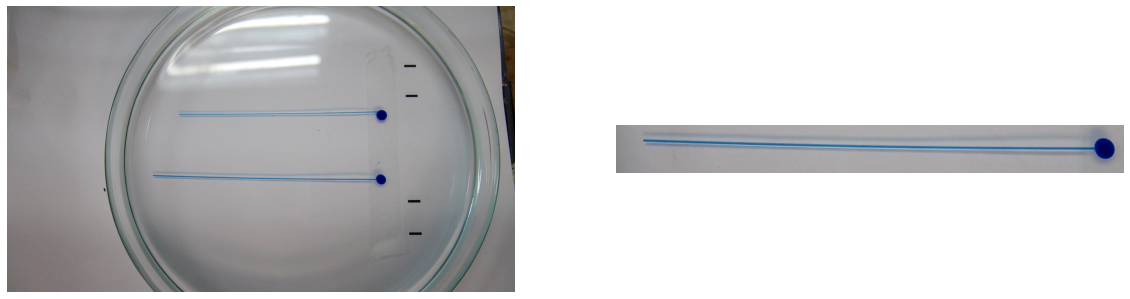

In [57]:
image = mpimg.imread( "image\\10.16.2020 Heptane-60%water40%ethanol\\frame 1\\1-25-44 PM\\10.16.2020 (2) " + str(1607).zfill(4) + ".jpg" )
crop_image = crop(image, ((610, 380), (500, 470), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [58]:
number_of_picture = 674
thresh = 45
template2 = []
l_def = 47.38143096192854
#1607-674 = 933
for i in range(934):
    if( True) :
        image = mpimg.imread( "image\\10.16.2020 Heptane-60%water40%ethanol\\frame 1\\1-25-44 PM\\10.16.2020 (2) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((610, 380), (500, 470), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [59]:
print(template2)
print(len(template2))

[343, 344, 346, 347, 348, 350, 351, 351, 351, 353, 355, 357, 357, 359, 360, 361, 363, 365, 365, 367, 367, 367, 368, 371, 372, 374, 373, 375, 376, 378, 379, 378, 380, 383, 383, 382, 384, 385, 389, 389, 389, 390, 391, 394, 394, 394, 396, 399, 399, 398, 401, 401, 402, 405, 404, 406, 407, 407, 409, 410, 412, 414, 414, 414, 415, 415, 417, 419, 420, 421, 421, 423, 423, 425, 426, 428, 428, 430, 430, 430, 432, 431, 434, 436, 436, 436, 437, 437, 440, 440, 441, 443, 445, 446, 446, 448, 448, 448, 449, 449, 451, 453, 453, 454, 455, 456, 457, 459, 459, 459, 461, 461, 462, 463, 467, 467, 466, 467, 467, 471, 473, 473, 474, 475, 477, 477, 478, 479, 480, 482, 483, 483, 484, 485, 486, 487, 489, 489, 490, 491, 493, 493, 493, 495, 496, 498, 499, 500, 500, 501, 502, 503, 503, 505, 505, 507, 509, 509, 508, 508, 509, 512, 512, 514, 514, 515, 516, 517, 518, 519, 520, 521, 520, 523, 524, 524, 524, 525, 527, 527, 528, 528, 530, 531, 532, 532, 533, 534, 536, 536, 538, 539, 540, 540, 540, 541, 542, 545, 545, 547,

concat 2 template and calculate pixel to centimeter

In [60]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [61]:
print(l_array)

[0.       0.       0.       ... 9.892858 9.892858 9.892858]


export data to exel

In [62]:
import pandas as pd

In [63]:
print(len(l_array))

1157


In [66]:
data = []
num_img = 451
for i in range(len(l_array)):
    data.append(( " 10.16.2020 (2) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('Heptanewater-60-40(1)_10.16.2020_1-25-44-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


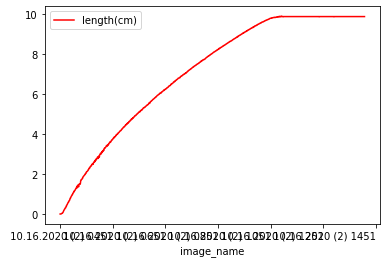

In [67]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()